In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [17]:
df=pd.read_csv("financial_fraud_transactions_india.csv")

In [18]:
df.shape

(50000, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     50000 non-null  object 
 1   User_ID            50000 non-null  object 
 2   Amount             50000 non-null  float64
 3   Channel            50000 non-null  object 
 4   Time               50000 non-null  object 
 5   Date               50000 non-null  object 
 6   Merchant_Category  50000 non-null  object 
 7   Location           50000 non-null  object 
 8   Device_ID          50000 non-null  object 
 9   Is_New_Device      50000 non-null  int64  
 10  Status             50000 non-null  object 
 11  Flag_Fraud         50000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [20]:
df.isnull().sum()

Transaction_ID       0
User_ID              0
Amount               0
Channel              0
Time                 0
Date                 0
Merchant_Category    0
Location             0
Device_ID            0
Is_New_Device        0
Status               0
Flag_Fraud           0
dtype: int64

In [21]:
df.head()

,Transaction_ID,User_ID,Amount,Channel,Time,Date,Merchant_Category,Location,Device_ID,Is_New_Device,Status,Flag_Fraud
0,TXN000001,U2212,88529.98,Card,3:47:40 PM,7/20/2025,Groceries,Ahmedabad,D87458,0,Success,0
1,TXN000002,U1525,49697.29,UPI,5:53:47 AM,4/15/2025,Fuel,Lucknow,D30116,0,Success,0
2,TXN000003,U6153,46102.99,Card,2:01:55 AM,4/3/2025,Food Delivery,Delhi,D74698,0,Success,1
3,TXN000004,U7732,116654.98,ATM,11:48:32 AM,6/4/2025,Electronics,Hyderabad,D56654,0,Success,0
4,TXN000005,U4983,56597.18,NetBanking,5:24:47 PM,4/28/2025,Fuel,Lucknow,D32730,0,Success,0


In [22]:
print("\nData types:")
print(df.dtypes)


Data types:
Transaction_ID        object
User_ID               object
Amount               float64
Channel               object
Time                  object
Date                  object
Merchant_Category     object
Location              object
Device_ID             object
Is_New_Device          int64
Status                object
Flag_Fraud             int64
dtype: object


Now Data Transformation--cleaning 

In [23]:
df['Amount'].unique()

array([ 88529.98,  49697.29,  46102.99, ..., 189226.9 , 148436.37,
       146836.89], shape=(49945,))

Converting proper column of channel

In [24]:
df['Channel'] = df['Channel'].str.title()


In [25]:
df['Location'].unique()

array(['Ahmedabad', 'Lucknow', 'Delhi', 'Hyderabad', 'Jaipur', 'Mumbai',
       'Kolkata', 'Pune', 'Bengaluru', 'Chennai'], dtype=object)

In [26]:
df['Location'] = df['Location'].str.title().replace({
    'Bangalore': 'Bengaluru',
    'Delhi': 'New Delhi'
})

In [27]:
df['Location'].unique()

array(['Ahmedabad', 'Lucknow', 'New Delhi', 'Hyderabad', 'Jaipur',
       'Mumbai', 'Kolkata', 'Pune', 'Bengaluru', 'Chennai'], dtype=object)

In [29]:
df['Flag_Fraud'].dtype

dtype('int64')

<Axes: title={'center': 'Fraud Rate by Channel (%)'}, xlabel='Channel'>

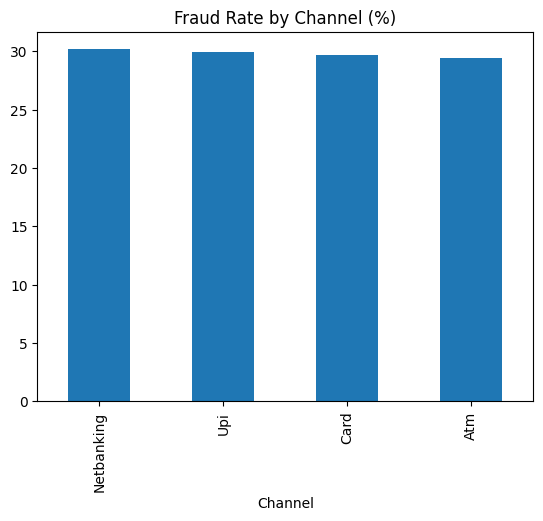

In [30]:
fraud_by_channel = df.groupby('Channel')['Flag_Fraud'].mean() * 100
fraud_by_channel.sort_values(ascending=False).plot(kind='bar', title='Fraud Rate by Channel (%)')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     50000 non-null  object 
 1   User_ID            50000 non-null  object 
 2   Amount             50000 non-null  float64
 3   Channel            50000 non-null  object 
 4   Time               50000 non-null  object 
 5   Date               50000 non-null  object 
 6   Merchant_Category  50000 non-null  object 
 7   Location           50000 non-null  object 
 8   Device_ID          50000 non-null  object 
 9   Is_New_Device      50000 non-null  int64  
 10  Status             50000 non-null  object 
 11  Flag_Fraud         50000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [45]:
# Merge 'Date' and 'Time' and assign to a new column in df
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_12080\2488308255.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [47]:
df['Timestamp'] 


0       2025-07-20 15:47:40
1       2025-04-15 05:53:47
2       2025-04-03 02:01:55
3       2025-06-04 11:48:32
4       2025-04-28 17:24:47
                ...        
49995   2025-06-15 15:39:26
49996   2025-04-21 14:11:22
49997   2025-02-23 18:07:20
49998   2025-02-23 20:07:21
49999   2025-06-13 21:12:02
Name: Timestamp, Length: 50000, dtype: datetime64[ns]

<Axes: title={'center': 'Fraud Rate by Hour of Day'}, xlabel='Hour'>

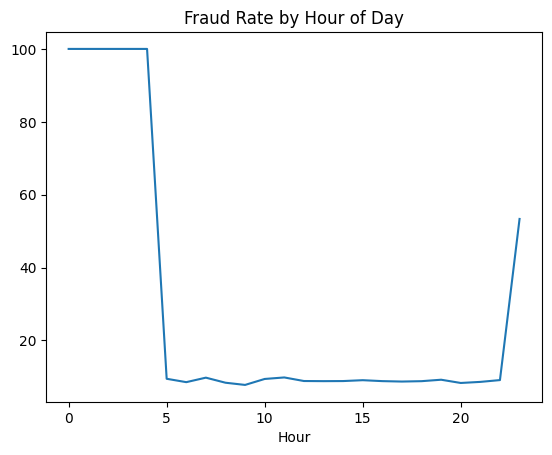

In [48]:

# Fraud over time
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day_name()
hourly_fraud = df.groupby('Hour')['Flag_Fraud'].mean() * 100
hourly_fraud.plot(title='Fraud Rate by Hour of Day')


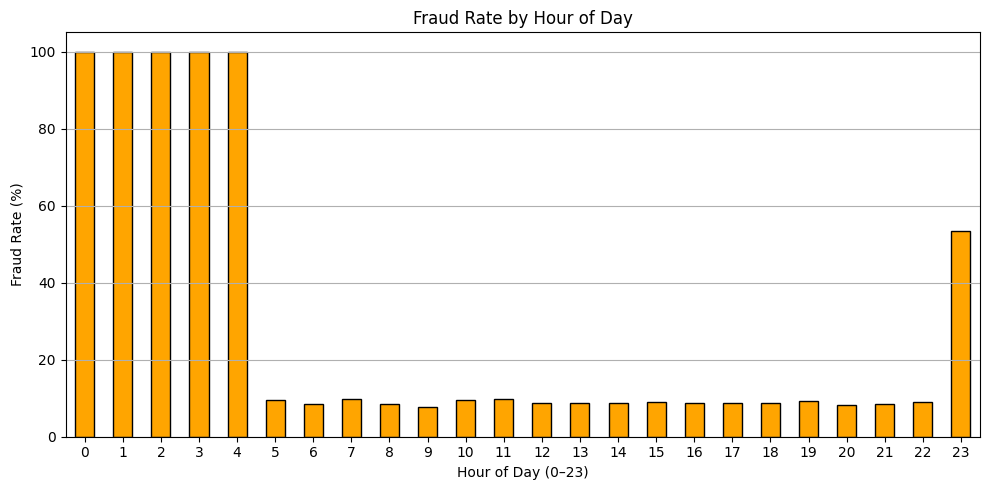

In [49]:
plt.figure(figsize=(10, 5))
hourly_fraud.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [50]:
total_fraud = df['Flag_Fraud'].sum()
print(f"Total number of fraud cases: {total_fraud}")

Total number of fraud cases: 14900


In [51]:
# Group by hour and count total frauds (Flag_Fraud == 1)
hourly_fraud_count = df[df['Flag_Fraud'] == 1].groupby('Hour').size()

print(hourly_fraud_count)


Hour
0     2139
1     2059
2     2100
3     2106
4     2069
5      192
6      175
7      204
8      176
9      162
10     204
11     198
12     179
13     182
14     183
15     195
16     189
17     179
18     188
19     195
20     173
21     177
22     189
23    1087
dtype: int64


<Axes: title={'center': 'Top 5 Fraud-Prone Locations'}, ylabel='Location'>

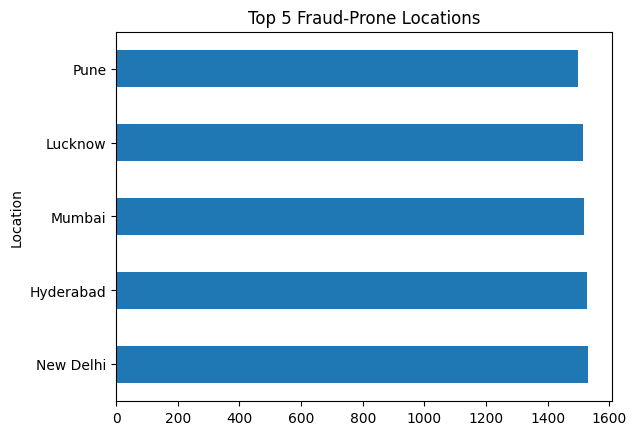

In [ ]:
# Top fraud locations
top_locations = df[df['Flag_Fraud'] == 1]['Location'].value_counts().head(5)
top_locations.plot(kind='barh', title='Top 5 Fraud-Prone Locations')

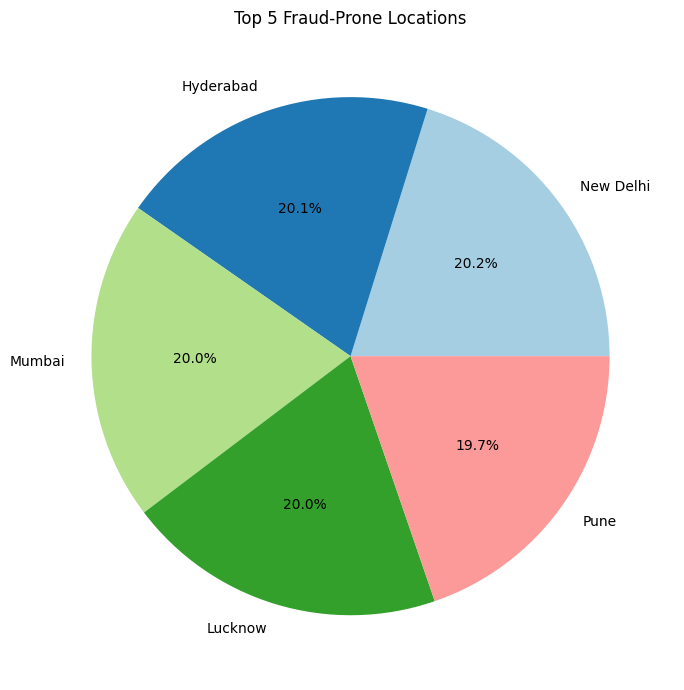

In [ ]:
top_locations = df[df['Flag_Fraud'] == 1]['Location'].value_counts().head(5)

plt.figure(figsize=(7, 7))
top_locations.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 5 Fraud-Prone Locations')
plt.ylabel('')  # hides the y-label
plt.tight_layout()
plt.show()

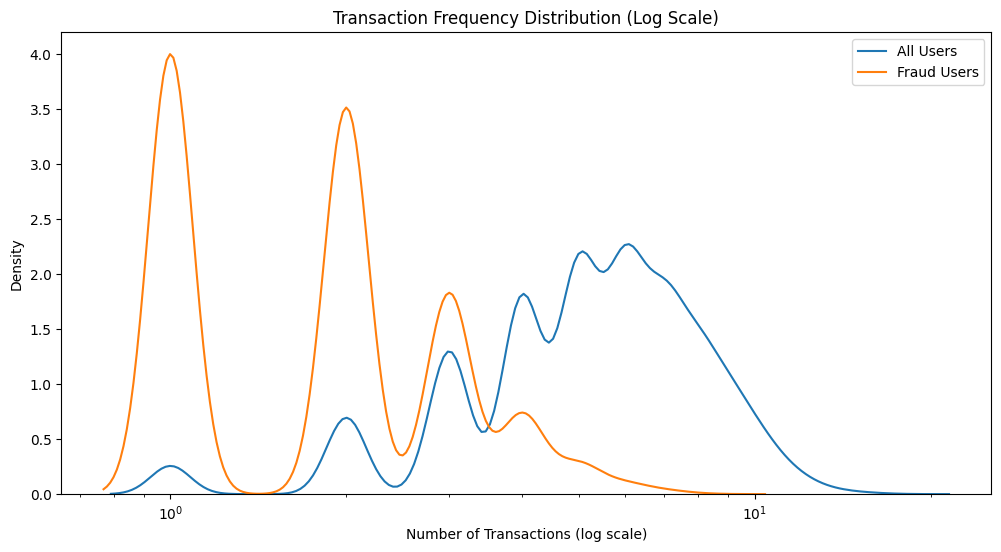

In [64]:
user_txns = df['User_ID'].value_counts()
fraud_users = df[df['Flag_Fraud']==1]['User_ID'].value_counts()

plt.figure(figsize=(12, 6))
sns.kdeplot(user_txns, label='All Users', log_scale=True)
sns.kdeplot(fraud_users, label='Fraud Users', log_scale=True)
plt.title('Transaction Frequency Distribution (Log Scale)')
plt.xlabel('Number of Transactions (log scale)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction_ID     50000 non-null  object        
 1   User_ID            50000 non-null  object        
 2   Amount             50000 non-null  float64       
 3   Channel            50000 non-null  object        
 4   Time               50000 non-null  object        
 5   Date               50000 non-null  object        
 6   Merchant_Category  50000 non-null  object        
 7   Location           50000 non-null  object        
 8   Device_ID          50000 non-null  object        
 9   Is_New_Device      50000 non-null  int64         
 10  Status             50000 non-null  object        
 11  Flag_Fraud         50000 non-null  int64         
 12  Timestamp          50000 non-null  datetime64[ns]
 13  Hour               50000 non-null  int32         
 14  Day   

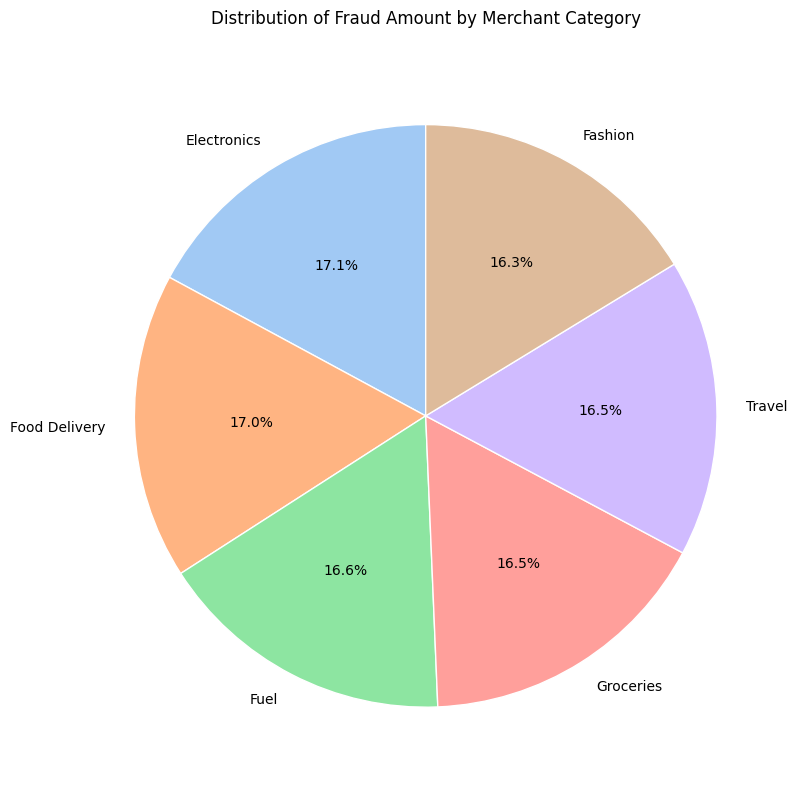

In [74]:
fraud_data = df[df['Flag_Fraud'] == 1]

# Group by Merchant_Category and sum the fraud Amount
fraud_amount_by_category = fraud_data.groupby('Merchant_Category')['Amount'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(fraud_amount_by_category, 
        labels=fraud_amount_by_category.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.title('Distribution of Fraud Amount by Merchant Category', pad=20)
plt.tight_layout()
plt.show()

In [75]:
df.to_csv("cleaned_fraud_data.csv", index=False)